<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/03_Correlation_analysis_%26_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [327]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/HS_Accidentabilidad.csv .
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Datos_plantilla.xlsx .

In [328]:
import pandas as pd

accidentabilidad = pd.read_csv('HS_Accidentabilidad.csv', sep=';')
accidentabilidad.head()

,ID,- DATOS DEL SUCESO -,Codigo accidentado,Fecha introduccion datos,Fecha accidente,Año,Codigo fecha accidente,Planta,Código empleado,Supervisor,Puesto habitual de trabajo,Puesto habitual de trabajo - Cerrado,MOI o MOD,La estaba desempeñando,"En caso negativo, indicar qué estaba desempeñando",Edad,Género,Turno,Numero personas implicadas,Llevaba EPIs puestos,Hora,Hora jornada,Tipo trabajador,"En caso de ser ajeno, indicar empresa",Lugar o seccion accidente,Línea de producción,Tarea que estaba realizando,Cumplimiento Instruccion de Seguridad,¿Se ha incumplido alguna de las normas o instrucciones existentes y explicadas?,"En caso de incumplimiento, comentarios:","En caso negativo, indicar la razon",Experiencia en puesto,Fecha ultima formacion completa sobre instrucciones en el puesto,Condicion peligrosa,Forma de producirse,Factores de peligro,Acto inseguro,Naturaleza de lesion,- FORMA EN QUE SE PRODUJO -,Descripción supervisor,...,Responsable de Departamento,Nombre de Responsable,Fecha cierre informe,- VALORACIÓN DE LOS HECHOS -,Probabilidad de repeticion del suceso,Gravedad potencial,Podría haberse dado otro riesgo en estas circunstancias,- MEDIDAS DE CONTROL -,Posibilidad de este suceso detectada en la evaluación de riesgos,Estaban contempladas las medidas preventivas en la Instruccion de Seguridad,Los implicados conocian la existencia del riesgo y las medidas a adoptar,"Se habian cumplido las normas establecidas, en caso de estar definidas",- PROPUESTA DE ACCIONES -,Estas acciones pueden añadir riesgos a los ya existentes,"1 En caso afirmativo, cual es",Se abre NC como consecuencia de esta investigacion,"2 En caso afirmativo, cual es",Requiere revision de Evaluacion de Riesgos,"3 En caso afirmativo, cual es",Requiere revision de alguna Instruccion de Seguridad,"4 En caso afirmativo, cual es",Requiere incorporar algun aspecto en el check list de Inspecciones,"5 En caso afirmativo, cual es",Requiere amonestacion verbal el empleado,"6 En caso afirmativo, cual es",Bloqueado,Fecha accidente trigger,- ACTUACIONES INMEDIATAS TOMADAS -,Actuación inmediata asistencial,Actuación inmediata instalaciones,- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -,Medida a planificar 1,Medida a planificar 2,Medida a planificar 3,Notificacion o investigacion,Modifica notificacion,Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?,"En caso afirmativo, cual es y como se actuó?",Tipo Tema,Acta reunión alta baja
0,1,0.0,HS-BRGS_0001,09/03/2019,18/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deficiente delimitación de zonas de trabajo o ...,NaN,NaN,Desconocimiento de riesgos y/o medidas prevent...,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-18,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
1,10,0.0,HS-BRGS_0010,09/03/2019,19/01/2016,2016.0,201601,2,NaN,0,Gruistas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencia o manejo de elementos pesados,NaN,Puentes grúa y accesorios de elevación,Incumplimiento de Instrucciones IS u otra orde...,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-19,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
2,11,0.0,HS-BRGS_0011,09/03/2019,28/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Movimientos intempestivos de la máquina,NaN,Puentes grúa y accesorios de elevación,Ninguno,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-28,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
3,12,0.0,HS-BRGS_0012,09/03/2019,29/01/2016,2016.0,201601,2,NaN,0,Gruista PRENSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [329]:

employees_gender= pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_genero')
employees_gender.head()

,Año,País,Hombres,Mujeres
0,2018,Alemania,379,67
1,2018,Argentina,56,10
2,2018,Bégica,0,0
3,2018,Brasil,270,58
4,2018,China,256,49


In [330]:
int_empl_category = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_categoria')
int_empl_category['Total'] = int_empl_category['Hombres'] + int_empl_category['Mujeres']
int_empl_category.head()

,Año,Categoria_laboral,Hombres,Mujeres,Total
0,2018,Director,110,10,120
1,2018,Mando intermedio,541,122,663
2,2018,Personal planta,4133,1378,5511
3,2019,Director,147,25,172
4,2019,Mando intermedio,497,122,619


In [331]:
int_empl_category['Categoria_laboral'].unique()

array(['Director', 'Mando intermedio', 'Personal planta'], dtype=object)

In [332]:
director = int_empl_category[['Año', 'Categoria_laboral', 'Total']]
director = director[director['Categoria_laboral']=='Director']


director.rename(columns={'Total':'Director'},inplace=True)
director.drop(columns={'Categoria_laboral'}, inplace=True)

director.head()

,Año,Director
0,2018,120
3,2019,172
6,2017,92


In [333]:
mando_int = int_empl_category[['Año', 'Categoria_laboral', 'Total']]
mando_int = mando_int[mando_int['Categoria_laboral']=='Mando intermedio']

mando_int.rename(columns={'Total':'Mandos_intermedios'},inplace=True)
mando_int.drop(columns={'Categoria_laboral'}, inplace=True)

mando_int.head()

,Año,Mandos_intermedios
1,2018,663
4,2019,619
7,2017,495


In [334]:
planta = int_empl_category[['Año', 'Categoria_laboral', 'Total']]
planta = planta[planta['Categoria_laboral']=='Personal planta']

planta.rename(columns={'Total':'planta'},inplace=True)
planta.drop(columns={'Categoria_laboral'}, inplace=True)

planta.head()

,Año,planta
2,2018,5511
5,2019,4161
8,2017,2926


In [335]:
positions = director.merge(mando_int, on='Año', how='inner')
positions = positions.merge(planta, on='Año', how='inner')
positions['Total'] = positions['Director'] + positions['Mandos_intermedios'] + positions['planta']
positions.head()

,Año,Director,Mandos_intermedios,planta,Total
0,2018,120,663,5511,6294
1,2019,172,619,4161,4952
2,2017,92,495,2926,3513


In [336]:
positions['perc_director'] = positions['Director'] / positions['Total']
positions['perc_mand_int'] = positions['Mandos_intermedios'] / positions['Total']
positions['perc_planta'] = positions['planta'] / positions['Total']

positions.head()

,Año,Director,Mandos_intermedios,planta,Total,perc_director,perc_mand_int,perc_planta
0,2018,120,663,5511,6294,0.019066,0.105338,0.875596
1,2019,172,619,4161,4952,0.034733,0.125000,0.840267
2,2017,92,495,2926,3513,0.026188,0.140905,0.832906


In [337]:
positions_perc = positions[['Año','perc_director','perc_mand_int', 'perc_planta']]
positions_perc.head()

,Año,perc_director,perc_mand_int,perc_planta
0,2018,0.019066,0.105338,0.875596
1,2019,0.034733,0.125000,0.840267
2,2017,0.026188,0.140905,0.832906


In [338]:
h_formacion = pd.read_excel('Datos_plantilla.xlsx',sheet_name='h_formacion')
h_formacion.head()

,Año,Pais,Horas formacion
0,2018,Alemania,10043
1,2018,Argentina,0
2,2018,Bégica,0
3,2018,Brasil,13680
4,2018,China,10625


In [339]:
accidentabilidad.columns

Index(['ID', '-  DATOS DEL SUCESO -', 'Codigo accidentado',
       'Fecha introduccion datos', 'Fecha accidente', 'Año',
       'Codigo fecha accidente', 'Planta', 'Código empleado', 'Supervisor',
       ...
       '- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -',
       'Medida a planificar 1', 'Medida a planificar 2',
       'Medida a planificar 3', 'Notificacion o investigacion',
       'Modifica notificacion',
       'Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?',
       'En caso afirmativo, cual es y como se actuó?', 'Tipo Tema',
       'Acta reunión alta baja'],
      dtype='object', length=106)

In [340]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/'G_Plantas y Tech'.csv .

In [341]:
plants_catalog = pd.read_csv('G_Plantas y Tech.csv', sep=';')
plants_catalog.head()

,ID,Fabrica,Activo,Tecnología,Pais
0,1,Argentina,1,Blanking,Argentina
1,2,Argentina,1,Corte Longitudinal,Argentina
2,3,Argentina,1,Corte Transversal,Argentina
3,4,Arizona,1,Células Soldadura,EEUU
4,5,Arizona,1,Corte Láser,EEUU


In [342]:
accidentabilidad = accidentabilidad.merge(plants_catalog, left_on='Planta', right_on='ID', how='left')
accidentabilidad.head(1)

,ID_x,- DATOS DEL SUCESO -,Codigo accidentado,Fecha introduccion datos,Fecha accidente,Año,Codigo fecha accidente,Planta,Código empleado,Supervisor,Puesto habitual de trabajo,Puesto habitual de trabajo - Cerrado,MOI o MOD,La estaba desempeñando,"En caso negativo, indicar qué estaba desempeñando",Edad,Género,Turno,Numero personas implicadas,Llevaba EPIs puestos,Hora,Hora jornada,Tipo trabajador,"En caso de ser ajeno, indicar empresa",Lugar o seccion accidente,Línea de producción,Tarea que estaba realizando,Cumplimiento Instruccion de Seguridad,¿Se ha incumplido alguna de las normas o instrucciones existentes y explicadas?,"En caso de incumplimiento, comentarios:","En caso negativo, indicar la razon",Experiencia en puesto,Fecha ultima formacion completa sobre instrucciones en el puesto,Condicion peligrosa,Forma de producirse,Factores de peligro,Acto inseguro,Naturaleza de lesion,- FORMA EN QUE SE PRODUJO -,Descripción supervisor,...,Gravedad potencial,Podría haberse dado otro riesgo en estas circunstancias,- MEDIDAS DE CONTROL -,Posibilidad de este suceso detectada en la evaluación de riesgos,Estaban contempladas las medidas preventivas en la Instruccion de Seguridad,Los implicados conocian la existencia del riesgo y las medidas a adoptar,"Se habian cumplido las normas establecidas, en caso de estar definidas",- PROPUESTA DE ACCIONES -,Estas acciones pueden añadir riesgos a los ya existentes,"1 En caso afirmativo, cual es",Se abre NC como consecuencia de esta investigacion,"2 En caso afirmativo, cual es",Requiere revision de Evaluacion de Riesgos,"3 En caso afirmativo, cual es",Requiere revision de alguna Instruccion de Seguridad,"4 En caso afirmativo, cual es",Requiere incorporar algun aspecto en el check list de Inspecciones,"5 En caso afirmativo, cual es",Requiere amonestacion verbal el empleado,"6 En caso afirmativo, cual es",Bloqueado,Fecha accidente trigger,- ACTUACIONES INMEDIATAS TOMADAS -,Actuación inmediata asistencial,Actuación inmediata instalaciones,- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -,Medida a planificar 1,Medida a planificar 2,Medida a planificar 3,Notificacion o investigacion,Modifica notificacion,Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?,"En caso afirmativo, cual es y como se actuó?",Tipo Tema,Acta reunión alta baja,ID_y,Fabrica,Activo,Tecnología,Pais
0,1,0.0,HS-BRGS_0001,09/03/2019,18/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deficiente delimitación de zonas de trabajo o ...,NaN,NaN,Desconocimiento de riesgos y/o medidas prevent...,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-18,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN,2,Argentina,1,Corte Longitudinal,Argentina


In [343]:
n_accidentes = accidentabilidad.groupby(['Año', 'Pais']).agg('count').reset_index()

n_accidentes = n_accidentes[['Año', 'Pais', 'Codigo accidentado']]
n_accidentes.rename(columns={'Codigo accidentado':'N_accidentes'}, inplace=True)
n_accidentes['Año'] = n_accidentes['Año'].astype(int)

n_accidentes.head()

,Año,Pais,N_accidentes
0,2015,España,202
1,2016,Argentina,224
2,2016,Brasil,58
3,2016,China,22
4,2016,EEUU,105


In [344]:
h_formacion['Pais'].unique()

array(['Alemania', 'Argentina', 'Bégica', 'Brasil', 'China', 'Colombia',
       'Dinamarca', 'EEUU', 'Eslovaquia', 'España', 'Finlandia',
       'Holanda', 'Hungría', 'México', 'Noruega', 'Polonia', 'Portugal',
       'Rep.Checa', 'Russia', 'Suecia', 'Turquía', 'UK', 'Rumanía',
       'Turqía'], dtype=object)

In [345]:
n_accidentes['Pais'].unique()

array(['España', 'Argentina', 'Brasil', 'China', 'EEUU', 'Rep.Checa',
       'Russia'], dtype=object)

In [346]:
df_total = h_formacion.merge(n_accidentes, on=['Año', 'Pais'], how='left')

In [347]:
df_total = df_total.fillna(0)
df_total.head()

,Año,Pais,Horas formacion,N_accidentes
0,2018,Alemania,10043,0.0
1,2018,Argentina,0,314.0
2,2018,Bégica,0,0.0
3,2018,Brasil,13680,198.0
4,2018,China,10625,51.0


In [348]:
len(df_total)

59

In [349]:
gravedad = accidentabilidad[['Año','Pais','Codigo accidentado','Gravedad potencial']]
gravedad = gravedad.groupby(['Año','Pais','Gravedad potencial']).agg('count').reset_index()
gravedad['Año'] = gravedad['Año'].astype(int)

gravedad.head()

,Año,Pais,Gravedad potencial,Codigo accidentado
0,2016,España,Leve,1
1,2017,Argentina,Grave,18
2,2017,Argentina,Leve,52
3,2017,Argentina,Muy grave,5
4,2017,Brasil,Grave,3


In [350]:
gravedad['Gravedad potencial'].unique()

array(['Leve', 'Grave', 'Muy grave'], dtype=object)

In [351]:
leve = gravedad[gravedad['Gravedad potencial']=='Leve']
leve.rename(columns={'Codigo accidentado':'Leve'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [352]:
leve.drop(columns={'Gravedad potencial'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [353]:
grave = gravedad[gravedad['Gravedad potencial']=='Grave']
grave.rename(columns={'Codigo accidentado':'Grave'}, inplace=True)
grave.drop(columns={'Gravedad potencial'}, inplace=True)
grave.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Año,Pais,Grave
1,2017,Argentina,18
4,2017,Brasil,3
6,2017,EEUU,25
9,2017,España,22
12,2018,Argentina,103


In [354]:
muy_grave = gravedad[gravedad['Gravedad potencial']=='Muy grave']
muy_grave.rename(columns={'Codigo accidentado':'Muy Grave'}, inplace=True)
muy_grave.drop(columns={'Gravedad potencial'}, inplace=True)
muy_grave.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Año,Pais,Muy Grave
3,2017,Argentina,5
5,2017,Brasil,1
8,2017,EEUU,4
11,2017,España,4
14,2018,Argentina,61


In [355]:
df_total = df_total.merge(leve, on=['Año', 'Pais'], how='left')

In [356]:
df_total = df_total.merge(grave, on=['Año', 'Pais'], how='left')
df_total = df_total.merge(muy_grave, on=['Año', 'Pais'], how='left')

In [357]:
df_total.fillna(0)
df_total.head()

,Año,Pais,Horas formacion,N_accidentes,Leve,Grave,Muy Grave
0,2018,Alemania,10043,0.0,NaN,NaN,NaN
1,2018,Argentina,0,314.0,150.0,103.0,61.0
2,2018,Bégica,0,0.0,NaN,NaN,NaN
3,2018,Brasil,13680,198.0,14.0,119.0,64.0
4,2018,China,10625,51.0,42.0,8.0,1.0


In [358]:
employees_gender['Total'] = employees_gender['Hombres'] + employees_gender['Mujeres']
employees_gender.head()

,Año,País,Hombres,Mujeres,Total
0,2018,Alemania,379,67,446
1,2018,Argentina,56,10,66
2,2018,Bégica,0,0,0
3,2018,Brasil,270,58,328
4,2018,China,256,49,305


In [359]:
employees_gender['perc_women'] = employees_gender['Mujeres'] / employees_gender['Total']
employees_gender['perc_men'] = employees_gender['Hombres'] / employees_gender['Total']

employees_gender = employees_gender.fillna(0)

In [360]:
employees_gender.rename(columns={'País':'Pais'}, inplace=True)
employees_gender.head()

,Año,Pais,Hombres,Mujeres,Total,perc_women,perc_men
0,2018,Alemania,379,67,446,0.150224,0.849776
1,2018,Argentina,56,10,66,0.151515,0.848485
2,2018,Bégica,0,0,0,0.000000,0.000000
3,2018,Brasil,270,58,328,0.176829,0.823171
4,2018,China,256,49,305,0.160656,0.839344


In [361]:
df_total = df_total.merge(employees_gender, on=['Año', 'Pais'], how='left')
df_total.drop(columns={'Hombres', 'Mujeres', 'Total'}, inplace=True)
df_total.head()

,Año,Pais,Horas formacion,N_accidentes,Leve,Grave,Muy Grave,perc_women,perc_men
0,2018,Alemania,10043,0.0,NaN,NaN,NaN,0.150224,0.849776
1,2018,Argentina,0,314.0,150.0,103.0,61.0,0.151515,0.848485
2,2018,Bégica,0,0.0,NaN,NaN,NaN,0.000000,0.000000
3,2018,Brasil,13680,198.0,14.0,119.0,64.0,0.176829,0.823171
4,2018,China,10625,51.0,42.0,8.0,1.0,0.160656,0.839344


In [362]:
df_total = df_total.merge(positions_perc, on='Año', how='inner')
df_total = df_total.fillna(0)
df_total.head()

,Año,Pais,Horas formacion,N_accidentes,Leve,Grave,Muy Grave,perc_women,perc_men,perc_director,perc_mand_int,perc_planta
0,2018,Alemania,10043,0.0,0.0,0.0,0.0,0.150224,0.849776,0.019066,0.105338,0.875596
1,2018,Argentina,0,314.0,150.0,103.0,61.0,0.151515,0.848485,0.019066,0.105338,0.875596
2,2018,Bégica,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019066,0.105338,0.875596
3,2018,Brasil,13680,198.0,14.0,119.0,64.0,0.176829,0.823171,0.019066,0.105338,0.875596
4,2018,China,10625,51.0,42.0,8.0,1.0,0.160656,0.839344,0.019066,0.105338,0.875596


In [363]:
int_empl_age = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_edad')
int_empl_age['Total'] = int_empl_age['Hombres'] + int_empl_age['Mujeres']

empl_30 = int_empl_age[int_empl_age['Rango edad']=='<30']
empl_30['perc_men_30'] = empl_30['Hombres'] / empl_30['Total']
empl_30['perc_women_30'] = empl_30['Mujeres'] / empl_30['Total']

empl_30.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Año,Rango edad,Hombres,Mujeres,Total,perc_men_30,perc_women_30
0,2018,<30,1160,139,1299,0.892995,0.107005
3,2019,<30,786,147,933,0.842444,0.157556
6,2017,<30,514,99,613,0.838499,0.161501


In [364]:
int_empl_age['Rango edad'].unique()

array(['<30', '30-50', '>50'], dtype=object)

In [365]:
empl_30_50 = int_empl_age[int_empl_age['Rango edad']=='30-50']
empl_30_50['perc_men_30_50'] = empl_30_50['Hombres'] / empl_30_50['Total']
empl_30_50['perc_women_30_50'] = empl_30_50['Mujeres'] / empl_30_50['Total']

empl_30_50.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Año,Rango edad,Hombres,Mujeres,Total,perc_men_30_50,perc_women_30_50
1,2018,30-50,2551,504,3055,0.835025,0.164975
4,2019,30-50,1883,400,2283,0.824792,0.175208
7,2017,30-50,1921,309,2230,0.861435,0.138565


In [366]:
empl_50 = int_empl_age[int_empl_age['Rango edad']=='>50']
empl_50['perc_men_50'] = empl_50['Hombres'] / empl_50['Total']
empl_50['perc_women_50'] = empl_50['Mujeres'] / empl_50['Total']

empl_50.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Año,Rango edad,Hombres,Mujeres,Total,perc_men_50,perc_women_50
2,2018,>50,993,112,1105,0.898643,0.101357
5,2019,>50,1560,176,1736,0.898618,0.101382
8,2017,>50,630,33,663,0.950226,0.049774


In [367]:
age = empl_30.merge(empl_30_50, on='Año', how='inner')
age = age.merge(empl_50, on='Año', how='inner')
age = age[['Año', 'perc_men_30','perc_women_30', 'perc_women_30_50', 'perc_men_30_50', 'perc_men_50', 'perc_women_50']]
age.head()

,Año,perc_men_30,perc_women_30,perc_women_30_50,perc_men_30_50,perc_men_50,perc_women_50
0,2018,0.892995,0.107005,0.164975,0.835025,0.898643,0.101357
1,2019,0.842444,0.157556,0.175208,0.824792,0.898618,0.101382
2,2017,0.838499,0.161501,0.138565,0.861435,0.950226,0.049774


In [368]:
df_total = df_total.merge(age, on='Año', how='left')
df_total.head()

,Año,Pais,Horas formacion,N_accidentes,Leve,Grave,Muy Grave,perc_women,perc_men,perc_director,perc_mand_int,perc_planta,perc_men_30,perc_women_30,perc_women_30_50,perc_men_30_50,perc_men_50,perc_women_50
0,2018,Alemania,10043,0.0,0.0,0.0,0.0,0.150224,0.849776,0.019066,0.105338,0.875596,0.892995,0.107005,0.164975,0.835025,0.898643,0.101357
1,2018,Argentina,0,314.0,150.0,103.0,61.0,0.151515,0.848485,0.019066,0.105338,0.875596,0.892995,0.107005,0.164975,0.835025,0.898643,0.101357
2,2018,Bégica,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019066,0.105338,0.875596,0.892995,0.107005,0.164975,0.835025,0.898643,0.101357
3,2018,Brasil,13680,198.0,14.0,119.0,64.0,0.176829,0.823171,0.019066,0.105338,0.875596,0.892995,0.107005,0.164975,0.835025,0.898643,0.101357
4,2018,China,10625,51.0,42.0,8.0,1.0,0.160656,0.839344,0.019066,0.105338,0.875596,0.892995,0.107005,0.164975,0.835025,0.898643,0.101357


In [369]:
len(df_total)

59

Necesitamos encontrar mas parametros que tengan una relacion directa con el numero de accidentes ademas del las horas de formacion

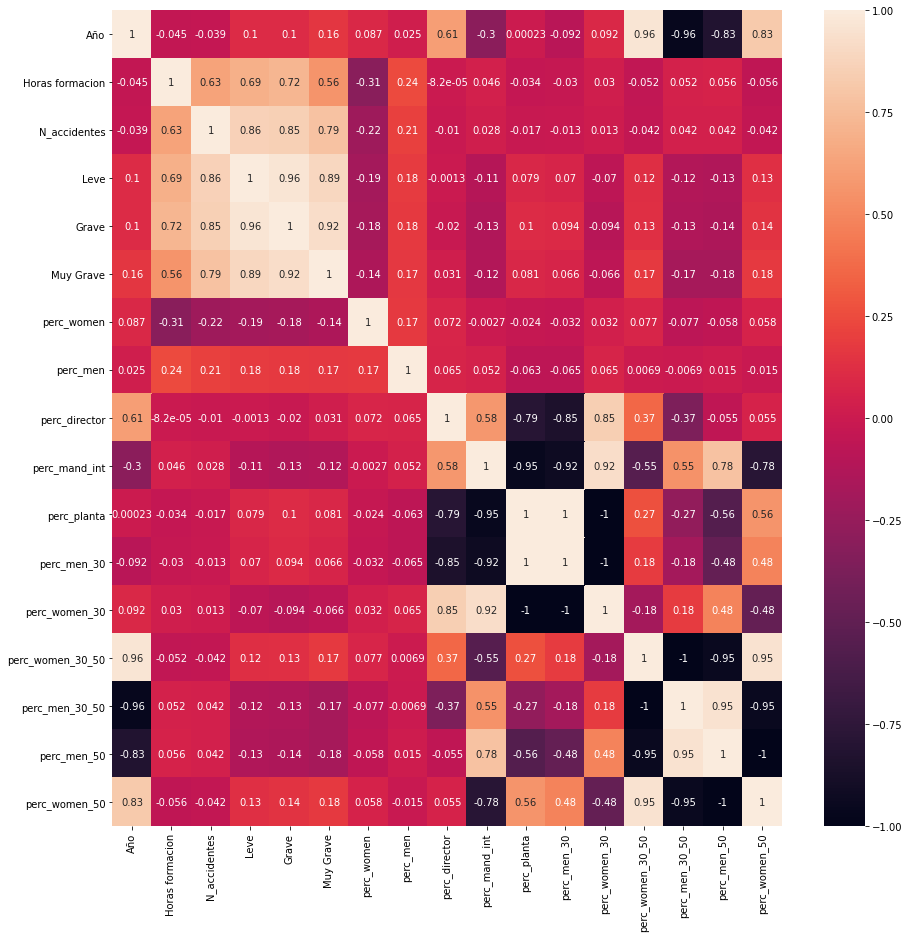

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15)) 

correlation_mat = df_total.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()